# Task 2.1 Preprocessing

In [1]:
# importing important library

import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


## clean_trainScore file is called from the previous task as this file is ready to use and all the missing values is handled in it.

In [2]:
df_train=pd.read_csv('clean_trainScore.csv')
df_test=pd.read_csv('test.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df_test.shape

(41088, 8)

In [5]:
df_train.shape

(1017209, 27)

In [6]:
df_train.head(25)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year,Season,CompetitionOpen,PromoOpen,SalesPerCustomer,SalesperCustomer
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,31,31,7,2015,Summer,82.0,24187.75,9.482883,9.482883
1,1,4,2015-07-30,5020.0,546.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,30,31,7,2015,Summer,82.0,24187.75,9.194139,9.194139
2,1,3,2015-07-29,4782.0,523.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,29,31,7,2015,Summer,82.0,24187.75,9.143403,9.143403
3,1,2,2015-07-28,5011.0,560.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,28,31,7,2015,Summer,82.0,24187.75,8.948214,8.948214
4,1,1,2015-07-27,6102.0,612.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,27,31,7,2015,Summer,82.0,24187.75,9.970588,9.970588
5,1,7,2015-07-26,0.0,0.0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,26,30,7,2015,Summer,82.0,24187.50,0.000000,0.000000
6,1,6,2015-07-25,4364.0,500.0,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,25,30,7,2015,Summer,82.0,24187.50,8.728000,8.728000
7,1,5,2015-07-24,3706.0,459.0,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,24,30,7,2015,Summer,82.0,24187.50,8.074074,8.074074
8,1,4,2015-07-23,3769.0,503.0,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,23,30,7,2015,Summer,82.0,24187.50,7.493042,7.493042
9,1,3,2015-07-22,3464.0,463.0,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,22,30,7,2015,Summer,82.0,24187.50,7.481641,7.481641


In [7]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Week', 'Month', 'Year',
       'Season', 'CompetitionOpen', 'PromoOpen', 'SalesPerCustomer',
       'SalesperCustomer'],
      dtype='object')

## need to extract
1. weekdays
2. weekends
3. number of days to holidays
4. Number of days after holiday
5. Beginning of month, mid month and ending of month

In [8]:
train_df = df_train.copy()

In [10]:
#converting Dates column into datetime formate
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [12]:
#Addition of weekdays column into Dataframe and +1 is to get monday at 1
train_df['weekdays'] = train_df['Date'].dt.weekday + 1

In [13]:
train_df['weekdays'].head()


0    5
1    4
2    3
3    2
4    1
Name: weekdays, dtype: int64

In [14]:
# weekend
train_df['Weekends'] = train_df['Date'].dt.weekday + 1

In [15]:
# This code will replace sunday and saturday as 0 
train_df['Weekends'] = train_df['Weekends'].mask(train_df['Weekends'].values >= 6, 0)

In [16]:
train_df[['weekdays','Weekends']].head()

,weekdays,Weekends
0,5,5
1,4,4
2,3,3
3,2,2
4,1,1


In [17]:
#creating csv file for future reference
train_df.to_csv('train_df.csv', index=False)

In [18]:
train_df.weekdays.dtype

dtype('int64')

In [19]:
# checking weekends 
train_df.query('Weekends == 0').head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year,Season,CompetitionOpen,PromoOpen,SalesPerCustomer,SalesperCustomer,weekdays,Weekends
5,1,7,2015-07-26,0.0,0.0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,26,30,7,2015,Summer,82.0,24187.50,0.000000,0.000000,7,0
6,1,6,2015-07-25,4364.0,500.0,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,25,30,7,2015,Summer,82.0,24187.50,8.728000,8.728000,6,0
12,1,7,2015-07-19,0.0,0.0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,19,29,7,2015,Summer,82.0,24187.25,0.000000,0.000000,7,0
13,1,6,2015-07-18,4406.0,512.0,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,18,29,7,2015,Summer,82.0,24187.25,8.605469,8.605469,6,0
19,1,7,2015-07-12,0.0,0.0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,12,28,7,2015,Summer,82.0,24187.00,0.000000,0.000000,7,0


In [20]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [21]:
train_df.isnull().sum().all()

False

In [22]:
train_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
Season                       0
CompetitionOpen              0
PromoOpen                    0
SalesPerCustomer             0
SalesperCustomer             0
weekdays                     0
Weekends                     0
dtype: int64

In [23]:
train_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                               float64
Customers                           float64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Day                                   int64
Week                                  int64
Month                                 int64
Year                                  int64
Season                          

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  float64       
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

# selecting features

In [32]:
columns = ['Sales','Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

feature_columns = ['Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

In [33]:
sample_size = 5000
sampled_df = train_df[columns].sample(sample_size)

## Separet Test and train files
train_x = sampled_df[feature_columns]
train_y = sampled_df[['Sales']]
train_x.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,Month,Year,StoreType,Assortment,CompetitionDistance,Promo2
369179,405,5,1,1,0,9,1,2015,a,a,1080.0,1
105131,116,2,1,1,0,7,10,2014,a,a,680.0,0
790936,868,3,1,0,0,12,2,2014,d,c,1360.0,1
149516,165,6,1,0,0,26,1,2013,a,a,3720.0,1
747422,821,2,1,0,1,22,7,2014,a,a,1700.0,0


In [34]:
train_y.shape

(5000, 1)

## Label Encoding

In [35]:
lb = LabelEncoder()
train_x['StoreType'] = lb.fit_transform(train_x['StoreType'])
train_x['Assortment'] = lb.fit_transform(train_x['Assortment'])

train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 369179 to 791657
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                5000 non-null   int64  
 1   DayOfWeek            5000 non-null   int64  
 2   Open                 5000 non-null   int64  
 3   Promo                5000 non-null   int64  
 4   SchoolHoliday        5000 non-null   int64  
 5   Day                  5000 non-null   int64  
 6   Month                5000 non-null   int64  
 7   Year                 5000 non-null   int64  
 8   StoreType            5000 non-null   int32  
 9   Assortment           5000 non-null   int32  
 10  CompetitionDistance  5000 non-null   float64
 11  Promo2               5000 non-null   int64  
dtypes: float64(1), int32(2), int64(9)
memory usage: 468.8 KB


In [36]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X = x_scaler.fit_transform(train_x)
X = train_x
Y = y_scaler.fit_transform(train_y)
Y=train_y

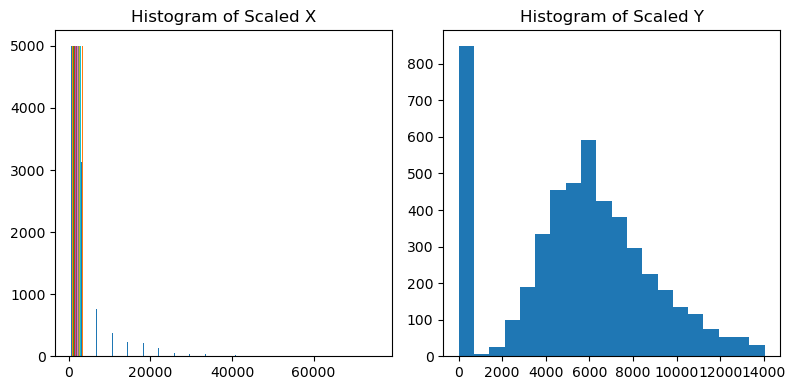

In [37]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(X, bins=20)
plt.title('Histogram of Scaled X')

plt.subplot(1, 2, 2)
plt.hist(Y, bins=20)
plt.title('Histogram of Scaled Y')

plt.tight_layout()
plt.show()


In [38]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=35)

In [39]:
rf_reg = RandomForestRegressor(n_estimators = 100, max_depth=25, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, random_state=0)

In [40]:
# score of the model
score = rf_reg.score(X_test, y_test)
print(f"Prediction Score of the Model is {round(score * 100, 2)}%")

Prediction Score of the Model is 70.34%


In [1]:
## preprocessing done

In [44]:
df_train["PromoInterval"].unique()

array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)